<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/L_R_interactivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:

#%%timeit
from IPython.utils import io
import sys
import os
sys.path.append('/content/drive/My Drive/')
import pandas as pd
sys.path.append('/content/drive/My Drive')
import pandas as pd
import numpy as np

import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install ipynb
import ipynb.fs.full.my_functions_c as mf
#from ipynb.fs.full.my_functions import Snippet_188_a, Snippet_191,Snippet_192,Snippet_190, ROC_
#from ipynb.fs.full.my_functions import load_clean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn import tree as tr_
import pydotplus
import collections
#!pip install ipywidgets==7.4
import ipywidgets as widgets
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Lista de caracteristicas posibles del modelo, de entre ellas se prueban disitintas selecciones:
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
          'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
          'flux_density_error', 'energy_flux', 'energy_flux_error',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'flux_100_300_mev_pos_err',
          'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
          'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']

  


# Trabajamos con 3 separciones poblacionales 

1.   pop1
2.   pop2
3.   full
## La separación de estas poblaciones se puede encontrar en:
https://colab.research.google.com/drive/1D4dCevS0IlVaqjwkLjBT4RaQilZmDatu#scrollTo=vuzPV4sqrstv


In [18]:
#features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error', 'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density', 'flux_density_error', 'energy_flux', 'energy_flux_error', 'curve_significance', 'spectrum_type', 'powerlaw_index', 'flux_100_300_mev', 'flux_100_300_mev_pos_err', 'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev', 'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err', 'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev', 'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev', 'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev', 'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev', 'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak', 'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval', 'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope', 'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log', 'F100_log']
     
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
print ("nº de características del modelo :",len(features_))
type(y_)

Cargando full
(1717, 57)
nº de características del modelo : 7


pandas.core.series.Series

# Implementacion grid search con validacion cruzada



Best parameter (CV score=0.879):
{'logistic__C': 21.54434690031882, 'pca__n_components': 6}


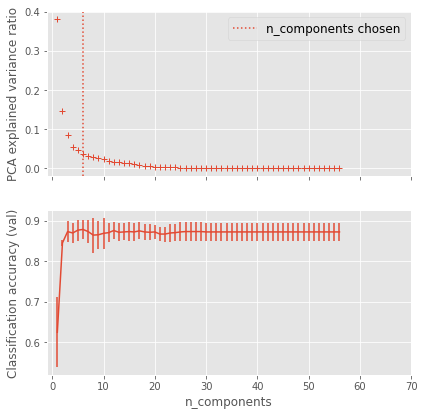

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params {'C': 0.04042323232323232, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score 0.873771507420236


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   14.5s finished


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
mf.grid_pca_LR(X_std,y_,X_train,y_train,70)

In [5]:
import seaborn as sns
#X.columns
##specify the 12 metrics column names to be modelled
#to_model_columns=X.columns[1:13]
#from sklearn.ensemble import IsolationForest
#clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
#clf.fit(X[to_model_columns])
#pred = clf.predict(X[to_model_columns])
#print(type(pred))
#X['anomaly']=pred
#outliers=X.loc[X['anomaly']==-1]
#outlier_index=list(outliers.index)
##print(outlier_index)
##Find the number of anomalies and normal points here points classified -1 are anomalous
#print(X['anomaly'].value_counts())
#X['source_type']=np.array(y_)
#df_ = X.loc[( X['anomaly']== -1)]
#df_2 = X.loc[( X['anomaly']> -1)]
#X['source_type']=np.array(y_)
#df_.head(5)
df_,df_2=mf.iso_tree(X,y_)

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


In [0]:
#g=sns.pairplot(df_2,hue='source_type', vars=[ 'analysis_flags', 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index'] , markers=["^","v"])
#g.hue_names=['BL Lac', 'FSRQ']
#g.fig.set_size_inches(20,18)
#fig_ = g.fig.get_figure()
#fig_.savefig("/content/drive/My Drive/lr_reducido-14 caracteristicas.png")
#g.fig.savefig("/content/drive/My Drive/lr_reducido-8 caracteristicas.png")

In [7]:
df_std=df_
df_y=df_std['source_type']
#features_r=[  'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
df_std=df_std[features_r]
df_std.head(3)

,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index
2,-0.610184,-0.716013,-0.753035,2.469248,0.369381,1.470371,2.34089
4,-0.521313,-0.652628,-0.702739,2.566261,0.326352,1.447286,2.12008
5,-0.540915,-0.715299,-0.741504,2.566944,0.355011,1.155952,2.26470


Best parameter (CV score=0.865):
{'logistic__C': 21.54434690031882, 'pca__n_components': 2}


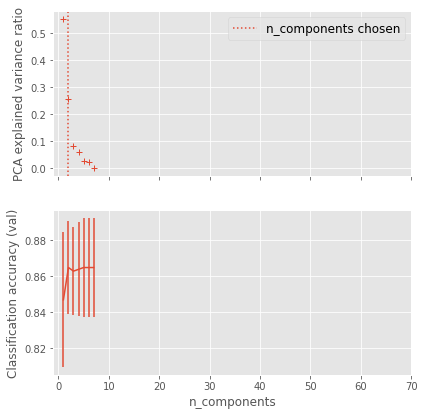

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params {'C': 0.6969757575757576, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score 0.8736012608353034


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    9.5s finished


In [21]:
df_std=df_2
df_y=df_std['source_type']
features_r=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
df_std=df_std[features_r]
X_train, X_test, y_train, y_test = train_test_split(df_std, df_y, test_size=0.3)
mf.grid_pca_LR(X_std,y_,X_train,y_train,70)
X_std=df_std
y_=df_y

In [0]:
   
def reduce_features (features_,df):
  from sklearn.preprocessing import StandardScaler
  new_df=df[features_]
  #df.drop(['source_type'], axis=1, inplace=True)
  sc = StandardScaler()
  sc.fit(X)
  #sc.fit(y)
  X_std = sc.transform(X)
  return new_df,X_std
#X,X_std=reduce_features(features_,X) 
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#df0.head(20)


In [22]:
from ipywidgets import  interact, widget  
from ipywidgets import  interact_manual
#from ipywidgets  import TwoByTwoLayout, AppLayout, GridspecLayout
from ipywidgets import interactive,interact, HBox, Layout,VBox

from ipywidgets import IntSlider
#size_subset = [0.2,0.25,0.3,0.35,0.4]
#@interact
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
 


def echo(Save='Salvar archivo como...', size_subset=[0.3, 0.2, 0.35,0.35, 0.4],kernel=['linear','rbf'],C='0.11',penalty_=['l1', 'l2', 'elasticnet'],solver=['liblinear','lbfgs'],Save_model=False):

  # hay que devolver X_std normalizado con el numero de caracteriscitcas reducidas usando reduce_features()
  X_train, X_test, y_train, y_test = train_test_split(df_std,df_y, test_size=size_subset)
  tree = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty=penalty_,
                   random_state=None, solver=solver, tol=0.0001, verbose=0,
                   warm_start=False)
  clf =tree.fit(X_train, y_train)
  echo.widget.layout.flex_flow='row wrap'
  # widget=interactive(echo,Save='Salvar archivo como...', size_subset=[0.2,0.25,0.3,0.35,0.4],loss=['entropy','gini'],split=100)
  #controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
  #output = widget.children[-1]
  #display(VBox([controls, output]))  


  print("test score: ",tree.score(X_test, y_test))
  print("train score: ",tree.score(X_train, y_train))
  print('Cross validation score with std desv')
 
  a,b=mf.Snippet_192(tree, X_test, y_test)
  
  print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )
  y_pred = tree.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  #plt.figure(figsize=(30,15))
  #plt.suptitle("Decision surface of a decision tree using paired features")
  #plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  #plt.axis("tight")
  #arbol=plot_tree(clf, filled=True, feature_names=X.columns)
  #tree
  import pickle
 
  model=tree
  pkl_filename = "/content/drive/My Drive/LR-pickle_model.pkl"
  with open(pkl_filename, 'wb') as file:
         pickle.dump(model, file)

  return tree
  



interactive(children=(Text(value='Salvar archivo como...', description='Save'), Dropdown(description='size_sub…

In [11]:

import pickle
from IPython.utils import io
# Load from file
pkl_filename = "/content/drive/My Drive/LR-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
#df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
#Calculate the accuracy score and predict target values from recovered model
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
#suprimir salida en pantalla del entrenamiento
print('Usando modelo recuperado sobre X_test')
with io.capture_output() as captured: 
  score = pickle_model.score(X_test, y_test)
print('ok')
print("Test score: {0:.2f} %".format(100 * score))
print('Prediciendo escore con des est.')
with io.capture_output() as captured:    
  a,b=mf.Snippet_192(pickle_model, X_test, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )


Usando modelo recuperado sobre X_test
ok
Test score: 86.75 %
Prediciendo escore con des est.
Accuracy: 0.86 (+/- 0.18)


Accuracy: 0.86 (+/- 0.18)
Optimal number of features : 4


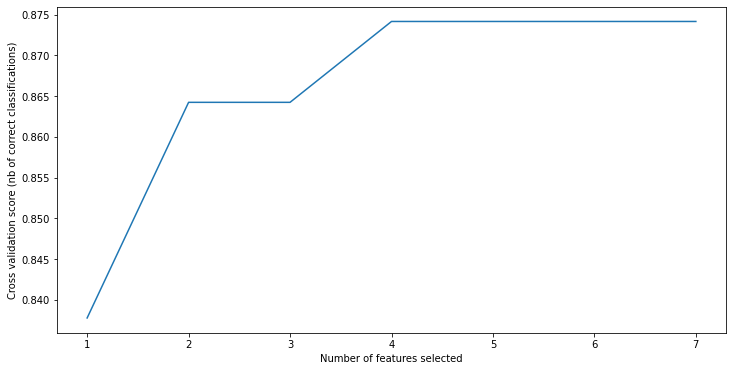

LogisticRegression
********************Hoe to evaluate model with learning curves********************


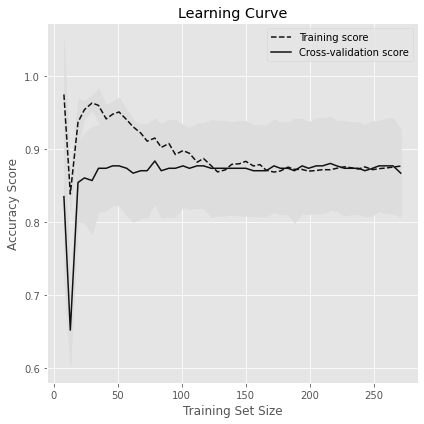

In [12]:
a,b=mf.Snippet_192(pickle_model, X_test, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (a , b*2) )
mf.Snippet_191(pickle_model, X_test, y_test)
mf.Snippet_188(X_test, y_test,pickle_model)

*********************Hoe to visualise cross validation scores*********************
0.8722409471955752


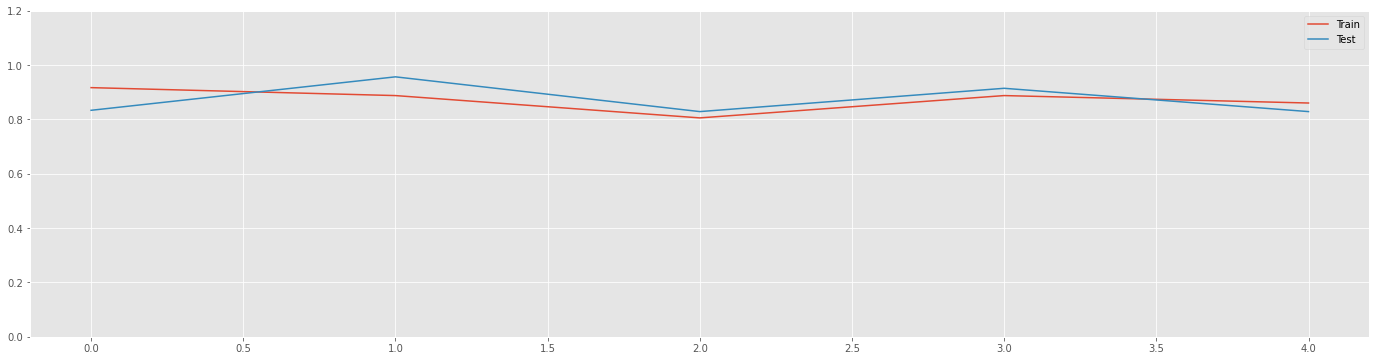

In [13]:
mf.Snippet_190(pickle_model, X_test, y_test, 5)

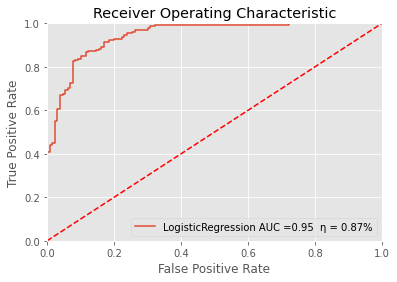

In [14]:
mf.ROC_(pickle_model, X_test,y_test )

#In order to rebuild a similar model with future versions of scikit-learn, additional metadata should be saved along the pickled model:
The training data, e.g. a reference to an immutable snapshot

The python source code used to generate the model

The versions of scikit-learn and its dependencies

The cross validation score obtained on the training data

This should make it possible to check that the cross-validation score is in the same range as before.

In [15]:
import pickle

#from google.colab import files
#files.download('your typical text file or what ever.txt')
# Create your model here (same as above)
#

# Save to file in the current working directory
#model=tree
#pkl_filename = "/content/drive/My Drive/tree(3-1)-pickle_model.pkl"
#with open(pkl_filename, 'wb') as file:
#    pickle.dump(model, file)
#Ojo se queda convertido en cero
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')

# Load from file
pkl_filename = "/content/drive/My Drive/LR-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Calculate the accuracy score and predict target values from recovered model

df_pre=df_UNK.copy()

print(df_pre.shape)
df_pre=df_pre[features_]
df_pre.drop(['source_type'], axis=1, inplace=True)
print(df_pre.shape)
#normalizamos el dtaframe A PREDECIR
sc = StandardScaler()
sc.fit(df_pre)
df_pre_std = sc.transform(df_pre)

#X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
#score = pickle_model.score(X_test, y_test)
#print("Test score: {0:.2f} %".format(100 * score))
#Snippet_192(pickle_model, X_test, y_test)

df_pre.head(5)

(573, 58)


KeyError: ignored

#PREDICCION USANDO EL MODELO SALVADO

In [0]:
# REDECIMOS USANDO EL DATAFRAME INCOGNITA CON EL MODELO ENTRENADO, SALVADO Y VUELTO A CARGAR CON PICKLE_MODEL
#-----------------------------------------------------------------#
Ypredict = pickle_model.predict(df_pre_std)
#-----------------------------------------------------------------#
#Ypredict

In [0]:
#df_UNK.head(20)
#df_pre.head(5)
#X_std.shape
#COMPLETAMOS EL DATAFRAME DE LOS BLAZARS DESCONOCIDOS CON NUESTRA PREDICCIÓN 
 #-----------------------------------------------------------------# 
df_UNK['source_type']=Ypredict
df_UNK.head(5)
#-----------------------------------------------------------------#


In [0]:
# RECUENTO DE CLASIFICACION
print ('Bl Lac = 1 -- FSRQ = 0')
df_UNK['source_type'].apply(pd.Series).stack().value_counts()
#Ypredict
